**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [2]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Data Science/Datasets/Datasets/breast-cancer.csv")

**View the first few observations of the dataset**

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Droping unnecessary columns**

In [4]:
df = df.drop(columns = "id")

**Checking for unique levels of diagnosis**

In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Label Encoding**

In [6]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [7]:
df.diagnosis.unique()

array([1, 0], dtype=int64)

**Assess the structure of the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Checking for null values**

In [9]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Checking for duplicates**

In [10]:
df.duplicated().sum()

0

**Exploratory Data Analysis (EDA)**

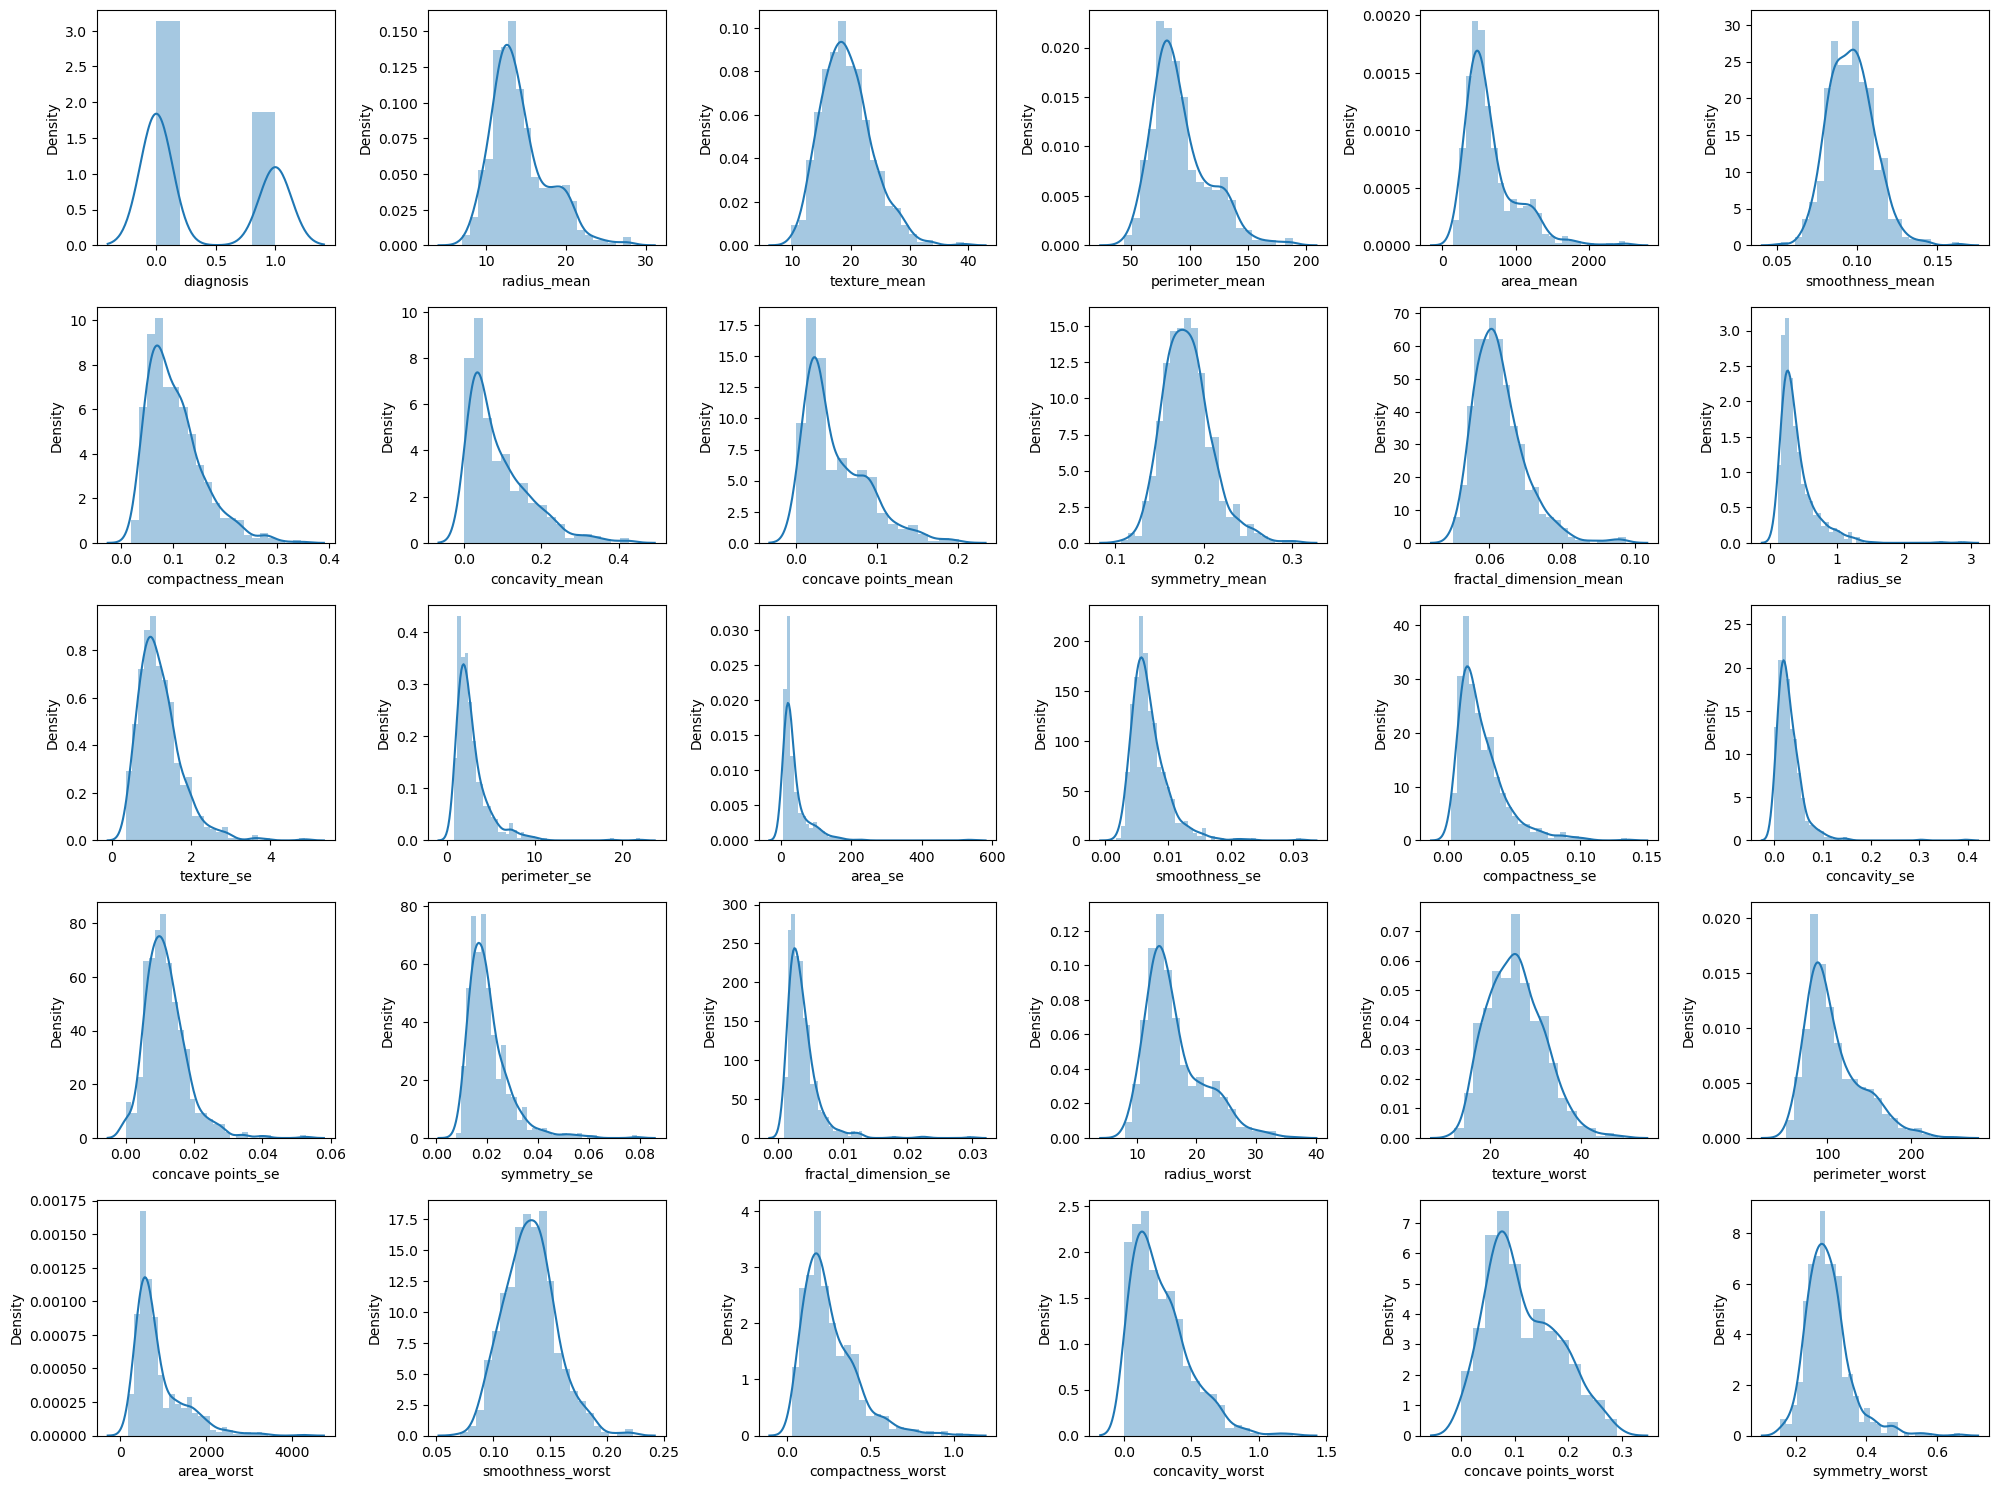

In [11]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

**Heatmap**

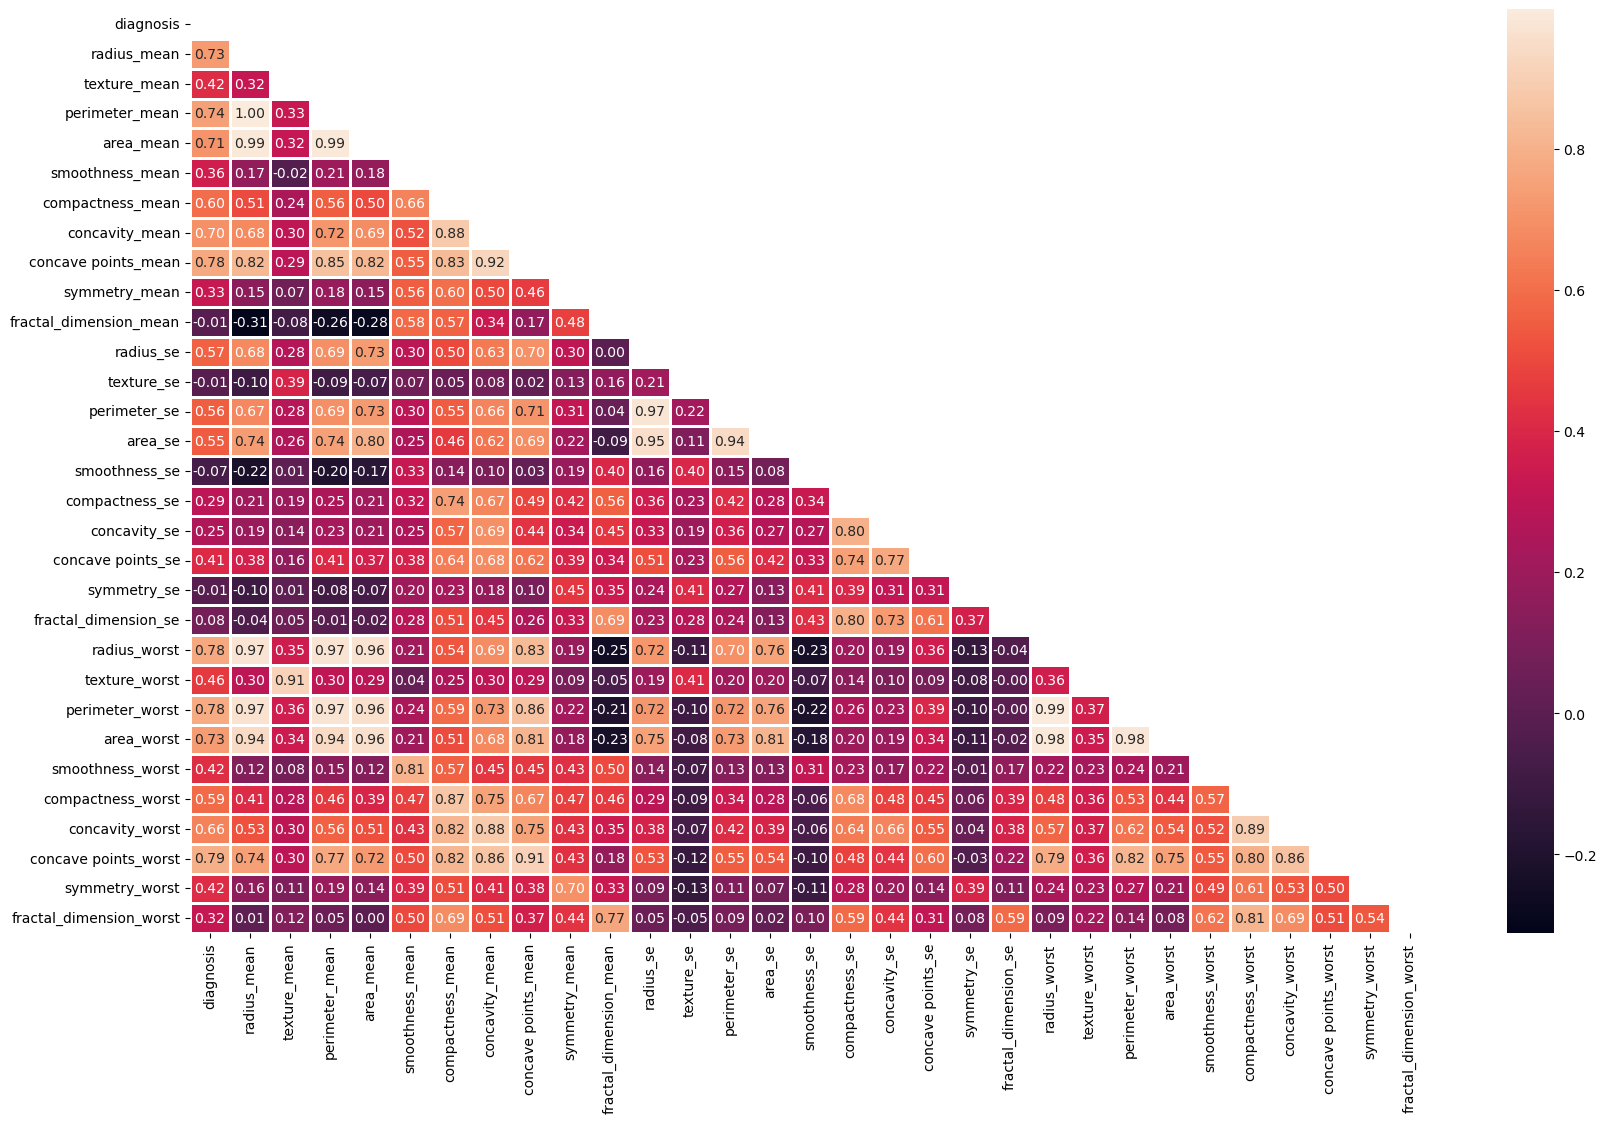

In [12]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

**Distribution of the Study Outcome**

In [13]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

**Defining the X and y features**

In [15]:
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

**Handling Class Imbalance**

In [16]:
## Load the required module
from imblearn.over_sampling import RandomOverSampler

## Initialize the RandomOverSampler
ros = RandomOverSampler(random_state = 42)

## Apply the RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

## Print the oversampled data
dict(zip(*np.unique(y_resampled, return_counts = True)))

{0: 357, 1: 357}

**Splitting data into training and test set**

In [18]:
## Loading the required libraries
from sklearn.model_selection import train_test_split

## Splitting
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 0)

**Standardization**

In [19]:
## Load the required module
from sklearn.preprocessing import StandardScaler

## Initialize the standard scaler
scaler = StandardScaler()

## Apply the standard scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Training various Machine Learning models**

**1. Logistic Regression**

In [22]:
## Load the required module
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

## Initialize the model
log = LogisticRegression()

## Fit the model
log.fit(X_train, y_train)

## Model predictions
log_pred = log.predict(X_test)
log_score = accuracy_score(y_test, log_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("Accuracy:", accuracy_score(y_test, log_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.99      0.96      0.97        96

    accuracy                           0.98       215
   macro avg       0.98      0.97      0.98       215
weighted avg       0.98      0.98      0.98       215

F1 Score: 0.9735449735449735
Precision: 0.989247311827957
Recall: 0.9583333333333334
Accuracy: 0.9767441860465116


**2. K Nearest Neighbors**

In [24]:
## Load the required modules
from sklearn.neighbors import KNeighborsClassifier

## Initialize the model
knn = KNeighborsClassifier()

## Fit the model
knn.fit(X_train, y_train)

## Model predictions
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("Accuracy:", accuracy_score(y_test, knn_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       119
           1       0.98      0.93      0.95        96

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

F1 Score: 0.9518716577540107
Precision: 0.978021978021978
Recall: 0.9270833333333334
Accuracy: 0.958139534883721


**3. Support Vector Machines**

In [23]:
## Load the required module
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Initialize the model
svc = SVC()

## Define parameters
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

## Fit the model using the best parameters
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

## Model predictions
svm_pred = grid_search.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       119
           1       0.99      0.94      0.96        96

    accuracy                           0.97       215
   macro avg       0.97      0.96      0.97       215
weighted avg       0.97      0.97      0.97       215

F1 Score: 0.9625668449197861
Precision: 0.989010989010989
Recall: 0.9375
Accuracy: 0.9674418604651163


**4. Stochastic Gradient Descent Classifier**

In [25]:
## Load the required module
from sklearn.linear_model import SGDClassifier

## Initialize the model
sgd = SGDClassifier()

## Define the parameters
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log_loss'], # Changed 'log' to 'log_loss'
    'penalty' : ['l1', 'l2']
}

## Fit the model with parameters
grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

## Make Predictions
sdg_pred = grid_search.predict(X_test)
sdg_score = accuracy_score(y_test, sdg_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, sdg_pred))
print("F1 Score:", f1_score(y_test, sdg_pred))
print("Precision:", precision_score(y_test, sdg_pred))
print("Recall:", recall_score(y_test, sdg_pred))
print("Accuracy:", accuracy_score(y_test, sdg_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.99      0.96      0.97        96

    accuracy                           0.98       215
   macro avg       0.98      0.97      0.98       215
weighted avg       0.98      0.98      0.98       215

F1 Score: 0.9735449735449735
Precision: 0.989247311827957
Recall: 0.9583333333333334
Accuracy: 0.9767441860465116


**5. Decision Tree Classifier**

In [26]:
## Load the required module
from sklearn.tree import DecisionTreeClassifier

## Initialize the model
dtc = DecisionTreeClassifier()

## Define the parameters
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

## Fit the models with parameters
grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

## Make Predictions
dtc_pred = grid_search_dt.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, dtc_pred))
print("F1 Score:", f1_score(y_test, dtc_pred))
print("Precision:", precision_score(y_test, dtc_pred))
print("Recall:", recall_score(y_test, dtc_pred))
print("Accuracy:", accuracy_score(y_test, dtc_pred))

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       119
           1       0.97      0.93      0.95        96

    accuracy                           0.95       215
   macro avg       0.96      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215

F1 Score: 0.9468085106382979
Precision: 0.967391304347826
Recall: 0.9270833333333334
Accuracy: 0.9534883720930233


**6. Random Forest Classifier**

In [29]:
## Load the required module
from sklearn.ensemble import RandomForestClassifier

## Initialize the model
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)

## Fit the model
rf.fit(X_train, y_train)

## Make predictions
rf_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.96      0.97      0.96        96

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

F1 Score: 0.9637305699481865
Precision: 0.9587628865979382
Recall: 0.96875
Accuracy: 0.9674418604651163


**7. Voting Classifier**

In [32]:
## Load the required module
from sklearn.ensemble import VotingClassifier

## Define the base models
classifiers = [('Logistic Regression', log), ('K Nearest Neighbours', knn), ('Support Vector Classifier', grid_search),
               ('Decision Tree', dtc)]

## Initialize the voting classifier
vc = VotingClassifier(estimators = classifiers)

## Fit the model
vc.fit(X_train, y_train)

## Model predictions
vc_pred = vc.predict(X_test)
vc_score = accuracy_score(y_test, vc_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, vc_pred))
print("F1 Score:", f1_score(y_test, vc_pred))
print("Precision:", precision_score(y_test, vc_pred))
print("Recall:", recall_score(y_test, vc_pred))
print("Accuracy:", accuracy_score(y_test, vc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       119
           1       0.99      0.94      0.96        96

    accuracy                           0.97       215
   macro avg       0.97      0.96      0.97       215
weighted avg       0.97      0.97      0.97       215

F1 Score: 0.9625668449197861
Precision: 0.989010989010989
Recall: 0.9375
Accuracy: 0.9674418604651163


**8. Ada Boost Classifier**

In [33]:
## Load the required model
from sklearn.ensemble import AdaBoostClassifier

## Initialize the model
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth = 1), n_estimators=180)

## Fit the model
ada.fit(X_train, y_train)

## Model predictions
ada_pred = ada.predict(X_test)

## Evaluate performance
ada_score = accuracy_score(y_test, ada_pred)
print("Classification Report:\n", classification_report(y_test, ada_pred))
print("F1 Score:", f1_score(y_test, ada_pred))
print("Precision:", precision_score(y_test, ada_pred))
print("Recall:", recall_score(y_test, ada_pred))
print("Accuracy:", accuracy_score(y_test, ada_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       119
           1       0.96      0.98      0.97        96

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

F1 Score: 0.9690721649484536
Precision: 0.9591836734693877
Recall: 0.9791666666666666
Accuracy: 0.9720930232558139


**9. Gradient Boosting Classifier**

In [34]:
## Load the required module
from sklearn.ensemble import GradientBoostingClassifier

## Initialize the model
gbc = GradientBoostingClassifier()

## Define the parameters
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

## Fit the model using gridsearch
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

## Make predictions
gbc_pred = grid_search_gbc.predict(X_test)

## Evaluate performance
gbc_score = accuracy_score(y_test, gbc_pred)
print("Classification Report:\n", classification_report(y_test, gbc_pred))
print("F1 Score:", f1_score(y_test, gbc_pred))
print("Precision:", precision_score(y_test, gbc_pred))
print("Recall:", recall_score(y_test, gbc_pred))
print("Accuracy:", accuracy_score(y_test, gbc_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       119
           1       0.96      0.98      0.97        96

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

F1 Score: 0.9690721649484536
Precision: 0.9591836734693877
Recall: 0.9791666666666666
Accuracy: 0.9720930232558139


**10. Stochastic Gradient Boosting (SGB)**

In [39]:
## Initialize the model
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)

## Fit the model
sgbc.fit(X_train, y_train)

## Model predictions
sgbc_pred = sgbc.predict(X_test)

## Evaluate performance
sgbc_score = accuracy_score(y_test, sgbc_pred)
print("Classification Report:\n", classification_report(y_test, sgbc_pred))
print("F1 Score:", f1_score(y_test, sgbc_pred))
print("Precision:", precision_score(y_test, sgbc_pred))
print("Recall:", recall_score(y_test, sgbc_pred))
print("Accuracy:", accuracy_score(y_test, sgbc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       119
           1       0.97      0.98      0.97        96

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

F1 Score: 0.9740932642487047
Precision: 0.9690721649484536
Recall: 0.9791666666666666
Accuracy: 0.9767441860465116


**Extreme Gradient Boosting**

**Model Comparison**

In [40]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting'],
    'Score': [log_score, knn_score, svm_score, sdg_score, dtc_score, rf_score, vc_score, ada_score, gbc_score, sgbc_score]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.976744
3,SGD Classifier,0.976744
8,Gradient Boosting Classifier,0.976744
9,Stochastic Gradient Boosting,0.976744
7,Ada Boost Classifier,0.972093
2,SVC,0.967442
5,Random Forest Classifier,0.967442
6,Voting Classifier,0.967442
1,KNN,0.958140
4,Decision Tree Classifier,0.953488


**Best model for diagnosing breast cancer is "Gradient Boosting Classifier" with an accuracy of 97.44%.**

In [41]:
## Lets save our model using pickle
import pickle as pkl
pkl.dump(grid_search_gbc, open("breast_cancer_model1.sav","wb"))